<a href="https://colab.research.google.com/github/Alemao2410/DS-Herman-Weigandt/blob/main/Proyecto_final_DS_Herman_Weigandt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis matemático y modelado

## Carga de datos, vista previa y preparación de dataset

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/MyDrive/Datascience 2da entrega/weather_features.csv'
df_clima_espana = pd.read_csv(url)
df_clima_espana.index
df_clima_espana

Mounted at /content/drive


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [2]:
df_clima_espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [3]:
url = '/content/drive/MyDrive/Datascience 2da entrega/energy_dataset.csv'
df_energia_espana = pd.read_csv(url, parse_dates=True, on_bad_lines='skip')
df_energia_espana.index
df_energia_espana.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
df_energia_espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
# Renombrar columnas para que coincidan en ambos dataframe del datapanel "time" to "dt_iso"
df_energia_espana.rename(columns={"time": "dt_iso"}, inplace=True)

In [6]:
# Convertir las temperaturas de Kelvin to Celsius
df_clima_espana["temp"] = df_clima_espana["temp"] - 273.15
df_clima_espana["temp_min"] = df_clima_espana["temp_min"] - 273.15
df_clima_espana["temp_max"] = df_clima_espana["temp_max"] - 273.15
print(df_clima_espana.head())

                      dt_iso city_name   temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia -2.675    -2.675    -2.675      1001   
1  2015-01-01 01:00:00+01:00  Valencia -2.675    -2.675    -2.675      1001   
2  2015-01-01 02:00:00+01:00  Valencia -3.464    -3.464    -3.464      1002   
3  2015-01-01 03:00:00+01:00  Valencia -3.464    -3.464    -3.464      1002   
4  2015-01-01 04:00:00+01:00  Valencia -3.464    -3.464    -3.464      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0     

In [10]:
# Conversión de la Marca Temporal a Variable tiempo y unión de dataframes
df_clima_espana["dt_iso"] = pd.to_datetime(df_clima_espana["dt_iso"], utc = True)
df_energia_espana["dt_iso"] = pd.to_datetime(df_energia_espana["dt_iso"], utc = True)
merged_df = pd.merge(df_clima_espana, df_energia_espana, on="dt_iso", how="inner")
print(merged_df)

                          dt_iso   city_name       temp  temp_min   temp_max  \
0      2014-12-31 23:00:00+00:00    Valencia  -2.675000 -2.675000  -2.675000   
1      2014-12-31 23:00:00+00:00      Madrid  -5.825000 -5.825000  -5.825000   
2      2014-12-31 23:00:00+00:00      Bilbao  -3.492687 -3.492687  -3.492687   
3      2014-12-31 23:00:00+00:00   Barcelona   8.475000  8.475000   8.475000   
4      2014-12-31 23:00:00+00:00     Seville   0.225000  0.225000   0.225000   
...                          ...         ...        ...       ...        ...   
178391 2018-12-31 22:00:00+00:00    Valencia   5.990000  5.000000   7.000000   
178392 2018-12-31 22:00:00+00:00      Madrid   2.000000  2.000000   2.000000   
178393 2018-12-31 22:00:00+00:00      Bilbao   2.450000  2.000000   3.000000   
178394 2018-12-31 22:00:00+00:00   Barcelona   6.980000  4.000000  10.000000   
178395 2018-12-31 22:00:00+00:00     Seville  10.820000  9.000000  12.000000   

        pressure  humidity  wind_speed 

In [12]:
# Seleccionar solo la columna de consumo de energía, precio y la columna "dt_iso" en el DataFrame de consumo
df_energia_consumo = df_energia_espana[['dt_iso', 'total load actual', 'price actual']]
df_energia_consumo.head()

,dt_iso,total load actual,price actual
0,2014-12-31 23:00:00+00:00,25385.0,65.41
1,2015-01-01 00:00:00+00:00,24382.0,64.92
2,2015-01-01 01:00:00+00:00,22734.0,64.48
3,2015-01-01 02:00:00+00:00,21286.0,59.32
4,2015-01-01 03:00:00+00:00,20264.0,56.04


In [13]:
# Unir ambos dataframe nuevamente con las variables seleccionadas
df_espana = pd.merge(df_clima_espana, df_energia_consumo, on="dt_iso", how="inner")
print(df_espana)

                          dt_iso   city_name       temp  temp_min   temp_max  \
0      2014-12-31 23:00:00+00:00    Valencia  -2.675000 -2.675000  -2.675000   
1      2014-12-31 23:00:00+00:00      Madrid  -5.825000 -5.825000  -5.825000   
2      2014-12-31 23:00:00+00:00      Bilbao  -3.492687 -3.492687  -3.492687   
3      2014-12-31 23:00:00+00:00   Barcelona   8.475000  8.475000   8.475000   
4      2014-12-31 23:00:00+00:00     Seville   0.225000  0.225000   0.225000   
...                          ...         ...        ...       ...        ...   
178391 2018-12-31 22:00:00+00:00    Valencia   5.990000  5.000000   7.000000   
178392 2018-12-31 22:00:00+00:00      Madrid   2.000000  2.000000   2.000000   
178393 2018-12-31 22:00:00+00:00      Bilbao   2.450000  2.000000   3.000000   
178394 2018-12-31 22:00:00+00:00   Barcelona   6.980000  4.000000  10.000000   
178395 2018-12-31 22:00:00+00:00     Seville  10.820000  9.000000  12.000000   

        pressure  humidity  wind_speed 

In [14]:
# Filtrar los datos solo para la región de Sevilla
df_sevilla = df_espana.loc[df_espana['city_name'] == 'Seville']

In [15]:
import pandas as pd

# Eliminación de outliers
Q1 = df_sevilla['temp'].quantile(0.25)
Q3 = df_sevilla['temp'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_sevilla[(df_sevilla['temp'] >= lower_bound) & (df_sevilla['temp'] <= upper_bound)]

# Check
print("Number of rows before removing outliers:", len(df_sevilla))
print("Number of rows after removing outliers:", len(df_cleaned))

Number of rows before removing outliers: 35557
Number of rows after removing outliers: 35557


In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35557 entries, 4 to 178395
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   dt_iso               35557 non-null  datetime64[ns, UTC]
 1   city_name            35557 non-null  object             
 2   temp                 35557 non-null  float64            
 3   temp_min             35557 non-null  float64            
 4   temp_max             35557 non-null  float64            
 5   pressure             35557 non-null  int64              
 6   humidity             35557 non-null  int64              
 7   wind_speed           35557 non-null  int64              
 8   wind_deg             35557 non-null  int64              
 9   rain_1h              35557 non-null  float64            
 10  rain_3h              35557 non-null  float64            
 11  snow_3h              35557 non-null  float64            
 12  clouds_all       

In [17]:
# Calcular la media de la columna "total load actual"
mean_total_load_actual = df_cleaned['total load actual'].mean()

# Reemplazar los valores nulos por la media
df_cleaned['total load actual'].fillna(mean_total_load_actual, inplace=True)

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35557 entries, 4 to 178395
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   dt_iso               35557 non-null  datetime64[ns, UTC]
 1   city_name            35557 non-null  object             
 2   temp                 35557 non-null  float64            
 3   temp_min             35557 non-null  float64            
 4   temp_max             35557 non-null  float64            
 5   pressure             35557 non-null  int64              
 6   humidity             35557 non-null  int64              
 7   wind_speed           35557 non-null  int64              
 8   wind_deg             35557 non-null  int64              
 9   rain_1h              35557 non-null  float64            
 10  rain_3h              35557 non-null  float64            
 11  snow_3h              35557 non-null  float64            
 12  clouds_all       

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.pairplot(df_cleaned)

Error in callback <function flush_figures at 0x7bb4cd5ec160> (for post_execute):


KeyboardInterrupt: ignored

In [20]:
# Reemplazar la columna del precio de la electricidad por su inversa utilizando .loc[]
df_cleaned.loc[:, 'price actual'] = 1 / df_cleaned['price actual']

# Mostrar el DataFrame actualizado con la columna del precio de la electricidad reemplazada por su inversa
print(df_cleaned.head())

                      dt_iso city_name   temp  temp_min  temp_max  pressure  \
4  2014-12-31 23:00:00+00:00   Seville  0.225     0.225     0.225      1039   
9  2015-01-01 00:00:00+00:00   Seville  0.225     0.225     0.225      1039   
14 2015-01-01 01:00:00+00:00   Seville  0.936     0.936     0.936      1039   
19 2015-01-01 02:00:00+00:00   Seville  0.936     0.936     0.936      1039   
24 2015-01-01 03:00:00+00:00   Seville  0.936     0.936     0.936      1039   

    humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
4         75           1        21      0.0      0.0      0.0           0   
9         75           1        21      0.0      0.0      0.0           0   
14        71           3        27      0.0      0.0      0.0           0   
19        71           3        27      0.0      0.0      0.0           0   
24        71           3        27      0.0      0.0      0.0           0   

    weather_id weather_main weather_description weather_icon  

## PCA

In [22]:
import numpy as np
# Dejar de nuestro dataframe final solo las columnas numéricas
numeric_columns = df_cleaned.select_dtypes(include=[np.number])
numeric_columns.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,total load actual,price actual
4,0.225,0.225,0.225,1039,75,1,21,0.0,0.0,0.0,0,800,25385.0,0.015288
9,0.225,0.225,0.225,1039,75,1,21,0.0,0.0,0.0,0,800,24382.0,0.015404
14,0.936,0.936,0.936,1039,71,3,27,0.0,0.0,0.0,0,800,22734.0,0.015509
19,0.936,0.936,0.936,1039,71,3,27,0.0,0.0,0.0,0,800,21286.0,0.016858
24,0.936,0.936,0.936,1039,71,3,27,0.0,0.0,0.0,0,800,20264.0,0.017844


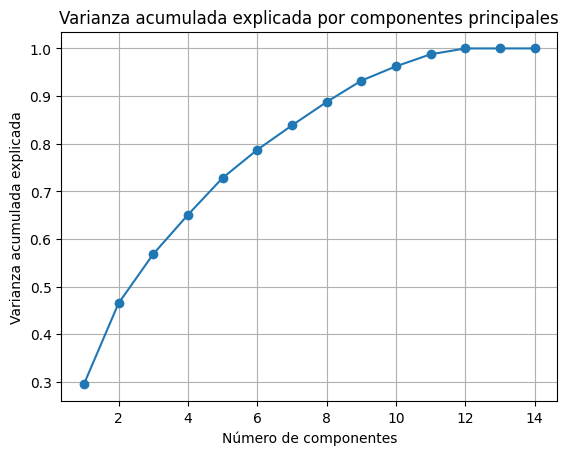

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Aplicar escalado de variables (estandarización)
scaler = StandardScaler()
scaled_data0 = scaler.fit_transform(numeric_columns)

# Aplicar PCA con todas las variables
pca = PCA()
pca_result = pca.fit_transform(scaled_data0)

# Obtener el porcentaje de varianza explicada por cada componente
explained_var_ratio0 = pca.explained_variance_ratio_

# Mostrar la varianza acumulada explicada por las componentes principales
cumulative_var_ratio = np.cumsum(explained_var_ratio0)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.title('Varianza acumulada explicada por componentes principales')
plt.grid(True)
plt.show()

In [30]:
# Crear un DataFrame con el porcentaje de varianza explicada por cada variable
variance_df0 = pd.DataFrame(data={'Variable': numeric_columns.columns, 'Variance Explained': explained_var_ratio0})

# Mostrar el DataFrame con el porcentaje de varianza explicada
variance_df0.head(14)

,Variable,Variance Explained
0,temp,2.946322e-01
1,temp_min,1.702126e-01
2,temp_max,1.033078e-01
3,pressure,8.243169e-02
4,humidity,7.753309e-02
5,wind_speed,5.901654e-02
6,wind_deg,5.123982e-02
7,rain_1h,4.915948e-02
8,rain_3h,4.475756e-02
9,snow_3h,3.016950e-02


In [31]:
# Eliminar las columnas que a pesar de ser numéricas se refieren a categorías del dataset
columns_to_drop = ['clouds_all', 'weather_id', 'wind_deg']
df_numerico = numeric_columns.drop(columns=columns_to_drop)

# Mostrar el DataFrame actualizado sin las columnas A, B y C
df_numerico.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_3h,total load actual,price actual
4,0.225,0.225,0.225,1039,75,1,0.0,0.0,0.0,25385.0,0.015288
9,0.225,0.225,0.225,1039,75,1,0.0,0.0,0.0,24382.0,0.015404
14,0.936,0.936,0.936,1039,71,3,0.0,0.0,0.0,22734.0,0.015509
19,0.936,0.936,0.936,1039,71,3,0.0,0.0,0.0,21286.0,0.016858
24,0.936,0.936,0.936,1039,71,3,0.0,0.0,0.0,20264.0,0.017844


In [32]:
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35557 entries, 4 to 178395
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               35557 non-null  float64
 1   temp_min           35557 non-null  float64
 2   temp_max           35557 non-null  float64
 3   pressure           35557 non-null  int64  
 4   humidity           35557 non-null  int64  
 5   wind_speed         35557 non-null  int64  
 6   rain_1h            35557 non-null  float64
 7   rain_3h            35557 non-null  float64
 8   snow_3h            35557 non-null  float64
 9   total load actual  35557 non-null  float64
 10  price actual       35557 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 3.3 MB


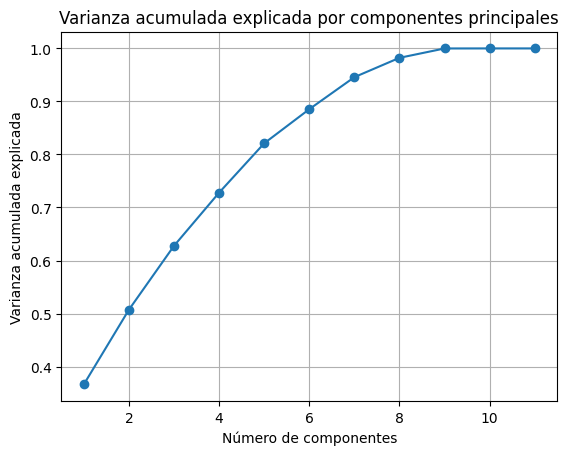

In [33]:
# Aplicar escalado de variables (estandarización)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerico)

# Aplicar PCA con las nuevas variables
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Obtener el porcentaje de varianza explicada por cada componente
explained_var_ratio = pca.explained_variance_ratio_

# Mostrar la varianza acumulada explicada por las componentes principales
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.title('Varianza acumulada explicada por componentes principales')
plt.grid(True)
plt.show()

In [34]:
# Crear un DataFrame con el porcentaje de varianza explicada por cada variable
variance_df = pd.DataFrame(data={'Variable': df_numerico.columns, 'Variance Explained': explained_var_ratio})

# Mostrar el DataFrame con el porcentaje de varianza explicada
variance_df.head(11)

,Variable,Variance Explained
0,temp,3.662748e-01
1,temp_min,1.409143e-01
2,temp_max,1.204681e-01
3,pressure,1.002866e-01
4,humidity,9.304749e-02
5,wind_speed,6.438052e-02
6,rain_1h,6.041823e-02
7,rain_3h,3.646671e-02
8,snow_3h,1.765705e-02
9,total load actual,8.609060e-05


In [35]:
# Eliminar las columnas de precio y cantidad del dataset
columnas_fuera = ['total load actual', 'price actual']
df_numerico_alt = df_numerico.drop(columns=columnas_fuera)

# Mostrar el DataFrame actualizado sin las columnas A, B y C
df_numerico_alt.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_3h
4,0.225,0.225,0.225,1039,75,1,0.0,0.0,0.0
9,0.225,0.225,0.225,1039,75,1,0.0,0.0,0.0
14,0.936,0.936,0.936,1039,71,3,0.0,0.0,0.0
19,0.936,0.936,0.936,1039,71,3,0.0,0.0,0.0
24,0.936,0.936,0.936,1039,71,3,0.0,0.0,0.0


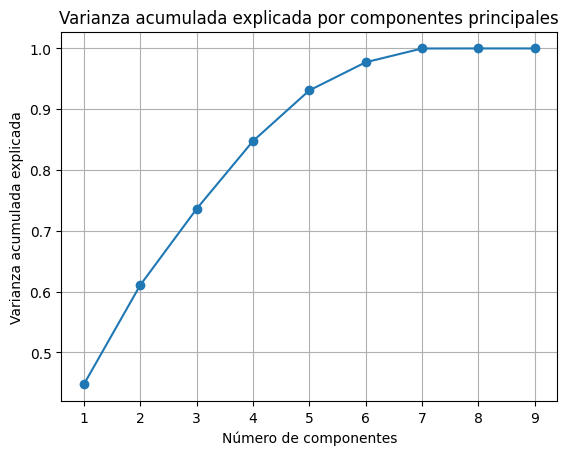

In [36]:
# Aplicar escalado de variables (estandarización)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerico_alt)

# Aplicar PCA con todas las variables
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Obtener el porcentaje de varianza explicada por cada componente
explained_var_ratio1 = pca.explained_variance_ratio_

# Mostrar la varianza acumulada explicada por las componentes principales
cumulative_var_ratio = np.cumsum(explained_var_ratio1)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.title('Varianza acumulada explicada por componentes principales')
plt.grid(True)
plt.show()

In [37]:
# Crear un DataFrame con el porcentaje de varianza explicada por cada variable
variance_df1 = pd.DataFrame(data={'Variable': df_numerico_alt.columns, 'Variance Explained': explained_var_ratio1})

# Mostrar el DataFrame con el porcentaje de varianza explicada
variance_df1.head(9)

,Variable,Variance Explained
0,temp,0.447382
1,temp_min,0.163210
2,temp_max,0.125357
3,pressure,0.111547
4,humidity,0.083417
5,wind_speed,0.046303
6,rain_1h,0.022675
7,rain_3h,0.000108
8,snow_3h,0.000000


### Conjetura adicional. Temperatura de confort


In [44]:
# Crear la nueva columna "diferencia_confort"
df_numerico_alt['diferencia_confort'] = (df_numerico_alt['temp'] - 22) ** 2

# Mostrar el DataFrame actualizado con la nueva columna
df_numerico_alt.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_3h,diferencia_confort
4,0.225,0.225,0.225,1039,75,1,0.0,0.0,0.0,474.150625
9,0.225,0.225,0.225,1039,75,1,0.0,0.0,0.0,474.150625
14,0.936,0.936,0.936,1039,71,3,0.0,0.0,0.0,443.692096
19,0.936,0.936,0.936,1039,71,3,0.0,0.0,0.0,443.692096
24,0.936,0.936,0.936,1039,71,3,0.0,0.0,0.0,443.692096


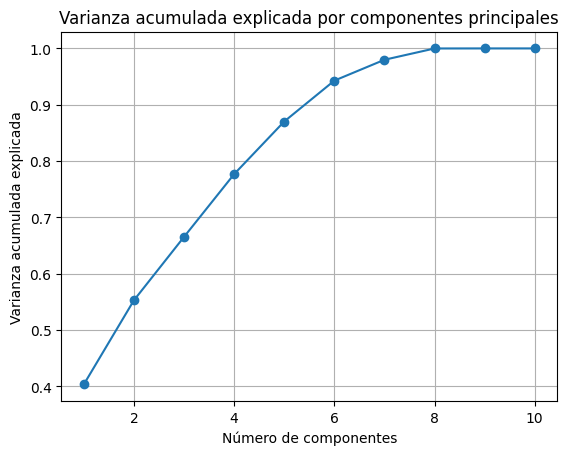

In [40]:
# Aplicar escalado de variables (estandarización)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerico_alt)

# Aplicar PCA con todas las variables
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Obtener el porcentaje de varianza explicada por cada componente
explained_var_ratio = pca.explained_variance_ratio_

# Mostrar la varianza acumulada explicada por las componentes principales
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.title('Varianza acumulada explicada por componentes principales')
plt.grid(True)
plt.show()

In [45]:
# Crear un DataFrame con el porcentaje de varianza explicada por cada variable
variance_df2 = pd.DataFrame(data={'Variable': df_numerico_alt.columns, 'Variance Explained': explained_var_ratio})

# Mostrar el DataFrame con el porcentaje de varianza explicada
variance_df2.head(10)

,Variable,Variance Explained
0,temp,0.403384
1,temp_min,0.149410
2,temp_max,0.112546
3,pressure,0.111428
4,humidity,0.093462
5,wind_speed,0.072558
6,rain_1h,0.037055
7,rain_3h,0.020063
8,snow_3h,0.000095
9,diferencia_confort,0.000000


    pressure  humidity  wind_speed  rain_1h  rain_3h  snow_3h  \
4       1039        75           1      0.0      0.0      0.0   
9       1039        75           1      0.0      0.0      0.0   
14      1039        71           3      0.0      0.0      0.0   
19      1039        71           3      0.0      0.0      0.0   
24      1039        71           3      0.0      0.0      0.0   

    diferencia_confort  
4           474.150625  
9           474.150625  
14          443.692096  
19          443.692096  
24          443.692096  


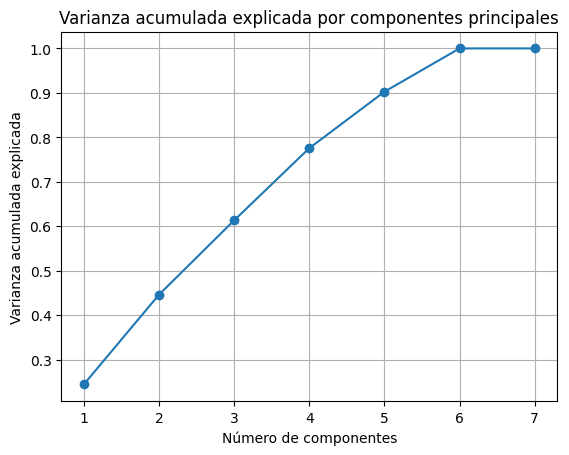

In [42]:
# Eliminar las columnas A, B y C del dataset
columnas_fuera1 = ['temp', 'temp_min', 'temp_max']
df_numerico_alt1 = df_numerico_alt.drop(columns=columnas_fuera1)

# Mostrar el DataFrame actualizado sin las columnas A, B y C
print(df_numerico_alt1.head())


# Aplicar escalado de variables (estandarización)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerico_alt1)

# Aplicar PCA con todas las variables
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Obtener el porcentaje de varianza explicada por cada componente
explained_var_ratio2 = pca.explained_variance_ratio_

# Mostrar la varianza acumulada explicada por las componentes principales
cumulative_var_ratio = np.cumsum(explained_var_ratio2)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.title('Varianza acumulada explicada por componentes principales')
plt.grid(True)
plt.show()

In [46]:
# Crear un DataFrame con el porcentaje de varianza explicada por cada variable
variance_df3 = pd.DataFrame(data={'Variable': df_numerico_alt1.columns, 'Variance Explained': explained_var_ratio2})

# Mostrar el DataFrame con el porcentaje de varianza explicada
variance_df3.head(7)

,Variable,Variance Explained
0,pressure,0.244036
1,humidity,0.201882
2,wind_speed,0.167171
3,rain_1h,0.162454
4,rain_3h,0.127023
5,snow_3h,0.097434
6,diferencia_confort,0.000000


### Dataset final

In [47]:
columnas_ajuste = ['rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'weather_id', 'wind_deg', 'city_name', 'weather_main', 'weather_description', 'weather_icon', 'price actual']
df_sevilla_ajustado = df_cleaned.drop(columns=columnas_ajuste)

df_sevilla_ajustado.head()

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,total load actual
4,2014-12-31 23:00:00+00:00,0.225,0.225,0.225,1039,75,1,25385.0
9,2015-01-01 00:00:00+00:00,0.225,0.225,0.225,1039,75,1,24382.0
14,2015-01-01 01:00:00+00:00,0.936,0.936,0.936,1039,71,3,22734.0
19,2015-01-01 02:00:00+00:00,0.936,0.936,0.936,1039,71,3,21286.0
24,2015-01-01 03:00:00+00:00,0.936,0.936,0.936,1039,71,3,20264.0


In [ ]:
# Establecer la columna de fecha como índice
df_sevilla_ajustado.set_index('dt_iso', inplace=True)

# Mostrar el DataFrame con la columna de fecha como índice
df_sevilla_ajustado.head()

                            temp  temp_min  temp_max  pressure  humidity  \
dt_iso                                                                     
2015-01-01 00:00:00+01:00  0.225     0.225     0.225      1039        75   
2015-01-01 01:00:00+01:00  0.225     0.225     0.225      1039        75   
2015-01-01 02:00:00+01:00  0.936     0.936     0.936      1039        71   
2015-01-01 03:00:00+01:00  0.936     0.936     0.936      1039        71   
2015-01-01 04:00:00+01:00  0.936     0.936     0.936      1039        71   

                           wind_speed  total load actual  
dt_iso                                                    
2015-01-01 00:00:00+01:00           1            25385.0  
2015-01-01 01:00:00+01:00           1            24382.0  
2015-01-01 02:00:00+01:00           3            22734.0  
2015-01-01 03:00:00+01:00           3            21286.0  
2015-01-01 04:00:00+01:00           3            20264.0  


## Modelado y parametrización

In [ ]:
from sklearn.model_selection import train_test_split

# X son las características (variables climáticas)
# y son los objetivos (cantidad)
X = df_sevilla_ajustado.drop(columns=['total load actual'])
y_cantidad = df_sevilla_ajustado['total load actual']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train_cantidad, y_test_cantidad = train_test_split(
    X, y_cantidad, test_size=0.3, random_state=42)

# Verificar las formas de los conjuntos divididos
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train_cantidad:", y_train_cantidad.shape)
print("Forma de y_test_cantidad:", y_test_cantidad.shape)

Forma de X_train: (24889, 6)
Forma de X_test: (10668, 6)
Forma de y_train_cantidad: (24889,)
Forma de y_test_cantidad: (10668,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Crear el modelo de Random Forest Regressor para cantidad de energía
rf_model_cantidad = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo para cantidad de energía
rf_model_cantidad.fit(X_train, y_train_cantidad)

# Realizar predicciones en el conjunto de prueba para cantidad de energía
y_pred_cantidad = rf_model_cantidad.predict(X_test)

# Evaluar los modelos para cantidad de energía
mse_cantidad = mean_squared_error(y_test_cantidad, y_pred_cantidad)
mae_cantidad = mean_absolute_error(y_test_cantidad, y_pred_cantidad)
r2_cantidad = r2_score(y_test_cantidad, y_pred_cantidad)


# Mostrar métricas de evaluación para cantidad de energía
print("Cantidad de energía - Mean Squared Error:", mse_cantidad)
print("Cantidad de energía - Mean Absolute Error:", mae_cantidad)
print("Cantidad de energía - R-squared:", r2_cantidad)


Cantidad de energía - Mean Squared Error: 15306984.409476876
Cantidad de energía - Mean Absolute Error: 3102.0155295508307
Cantidad de energía - R-squared: 0.2674319031002267


GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Seleccionar la variable objetivo (cantidad o precio de energía)
y = df_sevilla_ajustado['total load actual']  # O cambia a 'precio_energia'

# Dividir los datos en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(df_sevilla_ajustado.drop(['total load actual'], axis=1), y, test_size=0.3, random_state=42)

# Crear y ajustar un modelo Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gb_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas de evaluación
print("Gradient Boosting Regressor - Mean Squared Error:", mse)
print("Gradient Boosting Regressor - Mean Absolute Error:", mae)
print("Gradient Boosting Regressor - R-squared:", r2)

Gradient Boosting Regressor - Mean Squared Error: 17776771.417343125
Gradient Boosting Regressor - Mean Absolute Error: 3522.0475666501525
Gradient Boosting Regressor - R-squared: 0.14923179786067375


Análisis de Hiperparámetros

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Seleccionar la variable objetivo (cantidad o precio de energía)
y = df_sevilla_ajustado['total load actual']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(df_sevilla_ajustado.drop(['total load actual'], axis=1), y, test_size=0.3, random_state=42)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}

# Crear el modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Crear un modelo con los mejores hiperparámetros
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Entrenar el modelo con los mejores hiperparámetros en todo el conjunto de entrenamiento
best_rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

# Calcular el Mean Squared Error en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Best RandomForestRegressor - Mean Squared Error:", mse)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   4.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   4.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   5.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=   4.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   6.5s
[CV] END ...................max_depth=None, n_estimators=100; total time=   9.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   9.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   8.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=  11.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   8.4s
[CV] END ...................max_depth=None, n_estimators=150; total time=  14.7s
[CV] END ...................max_depth=None, n_est

In [ ]:
# Evaluar los modelos para cantidad de energía
mse_cantidad = mean_squared_error(y_test, y_pred)
mae_cantidad = mean_absolute_error(y_test, y_pred)
r2_cantidad = r2_score(y_test, y_pred)


# Mostrar métricas de evaluación para cantidad de energía
print("Cantidad de energía - Mean Squared Error:", mse_cantidad)
print("Cantidad de energía - Mean Absolute Error:", mae_cantidad)
print("Cantidad de energía - R-squared:", r2_cantidad)

Cantidad de energía - Mean Squared Error: 14982947.96387054
Cantidad de energía - Mean Absolute Error: 3112.5971380825226
Cantidad de energía - R-squared: 0.282939775580781


Residuos

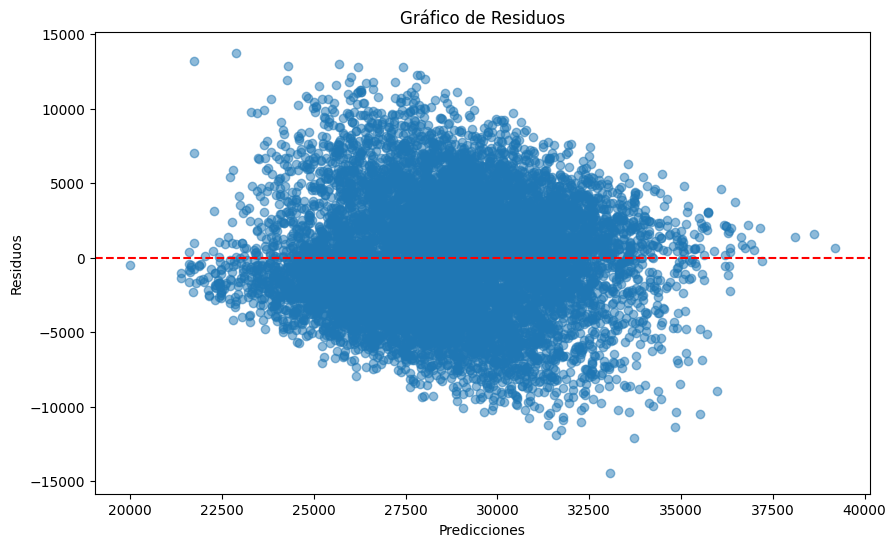

In [ ]:
# Calcular los residuos
residuals = y_test - y_pred

# Crear un gráfico de dispersión de residuos vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Línea de referencia en cero
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

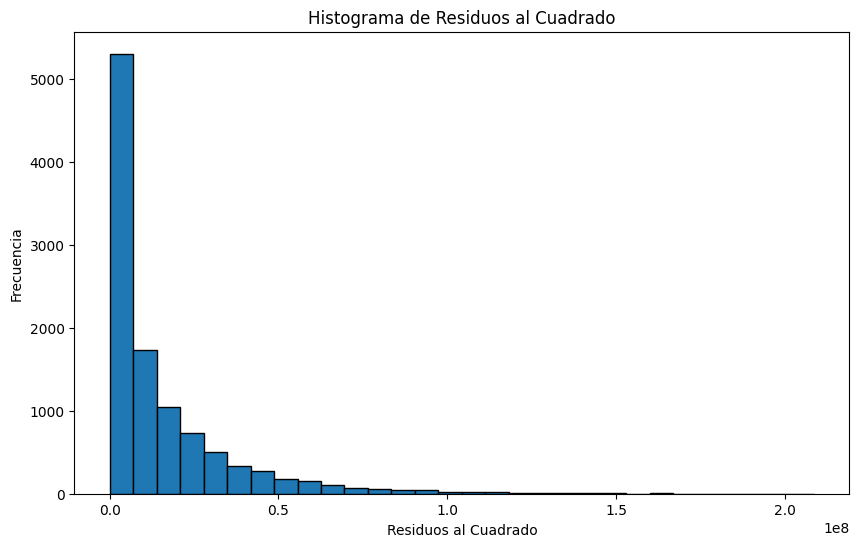

In [ ]:
# Calcular los residuos al cuadrado
squared_residuals = residuals ** 2

# Crear un histograma de los residuos al cuadrado
plt.figure(figsize=(10, 6))
plt.hist(squared_residuals, bins=30, edgecolor='black')
plt.title('Histograma de Residuos al Cuadrado')
plt.xlabel('Residuos al Cuadrado')
plt.ylabel('Frecuencia')
plt.show()

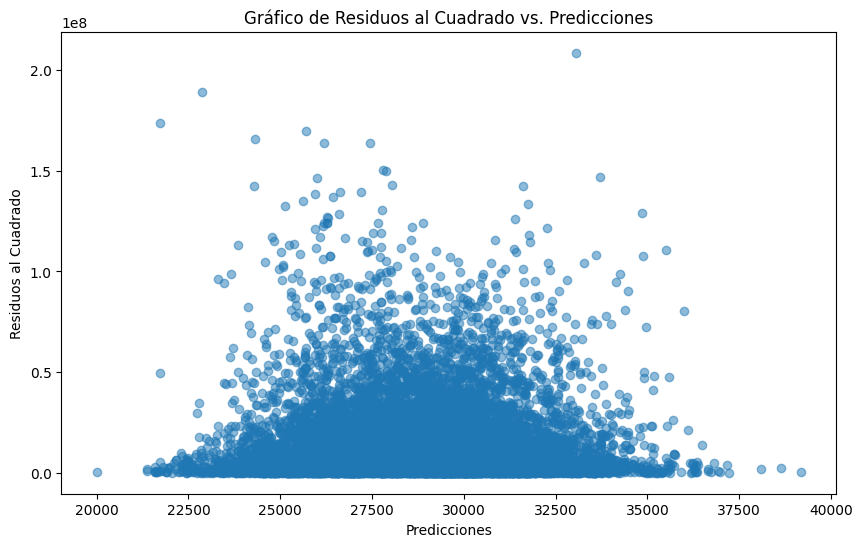

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, squared_residuals, alpha=0.5)
plt.title('Gráfico de Residuos al Cuadrado vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos al Cuadrado')
plt.show()

Modelo Final

In [ ]:
# Crea el modelo RandomForestRegressor utilizando los mejores hiperparámetros
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Imprime la definición y los valores de los parámetros
print("Definición del modelo:")
print(best_rf_model)

# Entrena el modelo con el conjunto de datos completo
best_rf_model.fit(X_train, y_train)

# Ahora tienes el modelo final entrenado con los mejores hiperparámetros

Definición del modelo:
RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)


RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

In [ ]:
importances = best_rf_model.feature_importances_


In [ ]:
# Obtener los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame para mostrar las importancias junto con los nombres de las características
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las importancias de mayor a menor
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias
print(importances_df)


      Feature  Importance
0        temp    0.220457
4    humidity    0.210863
3    pressure    0.188060
2    temp_max    0.148611
1    temp_min    0.130922
5  wind_speed    0.101087
